In [2]:
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
sys.path.append("/Users/mklukas/nta/htmresearch/")

from htmresearch.support.cans.reanchoring import *
%load_ext autoreload
%autoreload 2




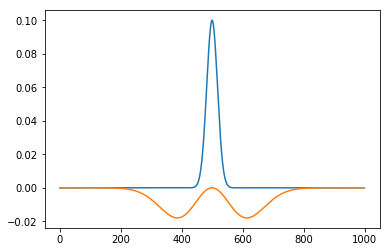

In [13]:
x = np.linspace(-10,10,num=1000)


def can_beanie(x):
    a          = .1
    lambda_net = 4.0
    beta       = 3.0 / lambda_net**2
    gamma      = 1.05 * beta
    
    x_length_squared = x**2
    
    return a*np.exp(-4.*x_length_squared)

f = can_beanie(x)
g = W_zero(x)
plt.plot(f)
plt.plot(g)

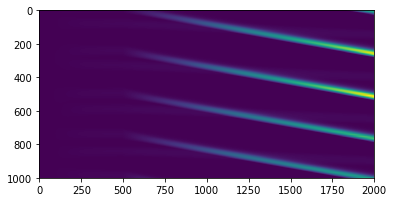

In [153]:

r = 25.
n = 1000



# entorhinal = MEC(num_modules=5, 
#                  cells_per_module=400, 
#                  diameter_of_modules=26.,
#                  vel_gains=np.arange(1,6)*0.15)
    
Ms = []    
for i in range(5):
    Ms.append(GridModule1d(n,r, vel_gain=0.1 + i*0.1))

right  = np.array([0,1])
left  = np.array([1,0])

v = np.zeros(2)
T = 2000
S = np.zeros((len(Ms),T,n))
S[:,0] = np.random.sample((len(Ms),n))*0.001
for i in range(len(Ms)):
    M = Ms[i]
    M.s = S[i,0]

for t in range(1,T):
    if t > 500:
        v = right
    for i in range(len(Ms)):
        M = Ms[i]
        S[i,t] = M.evolve(b=0.1, v=v, dt=0.05, tau=3.);

plt.imshow(S[0].T + S[4].T)

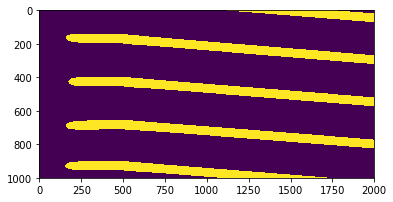

In [157]:
plt.imshow( S[1,:].T > 0.1)